## Set up imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar

## Line plot

In [2]:
stock = pd.read_csv('GOOG.csv', header = None, delimiter = ',')

In [3]:
stock.columns = ['Date', 'Price']
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')

In [4]:
indexed_stock = stock.set_index('Date')
type(stock.Date)

pandas.core.series.Series

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


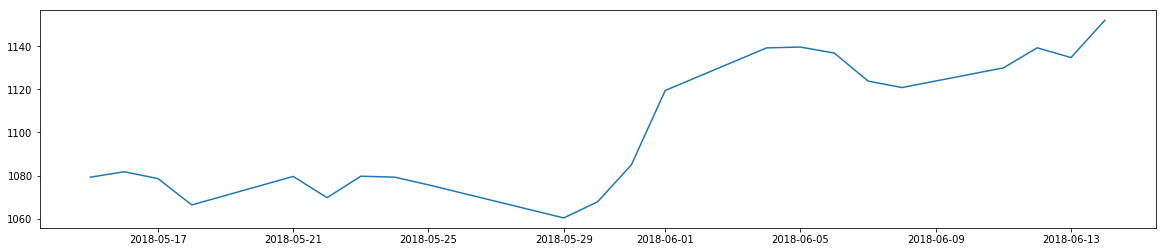

In [5]:
plt.figure(figsize=(20, 4))
plt.plot(indexed_stock.Price)
plt.show()

In [6]:
df = pd.read_csv('GOOG.csv', header = None, names = ['date', 'price'], index_col = ['date'])

<function matplotlib.pyplot.show(*args, **kw)>

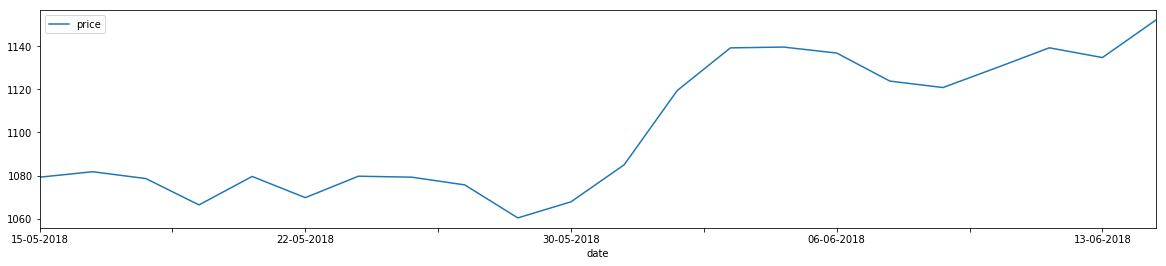

In [7]:
df.plot(figsize=(20, 4))
plt.show

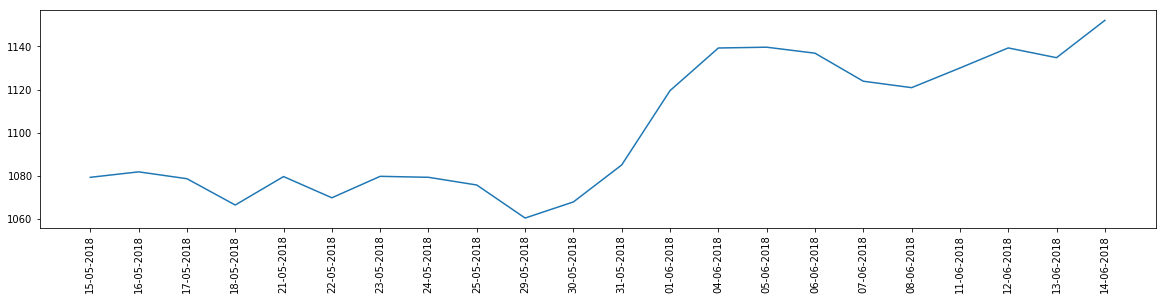

In [8]:
plt.figure(figsize=(20, 4), )
plt.plot(df.price)
plt.xticks(rotation=90)
plt.show()

## Bar plot

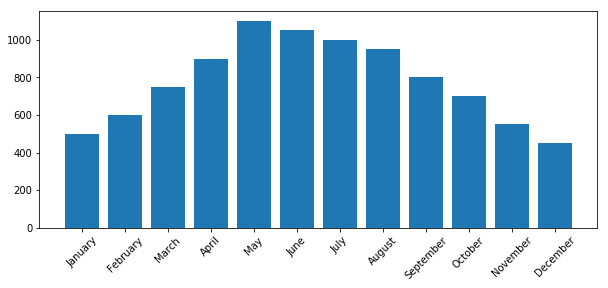

In [9]:
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
plt.xticks(month_num, calendar.month_name[1:13], rotation = 45)
plot = ax.bar(month_num, units_sold)
plt.show()

In [10]:
for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002 * height, '%d' % int(height), ha='center', va='bottom')

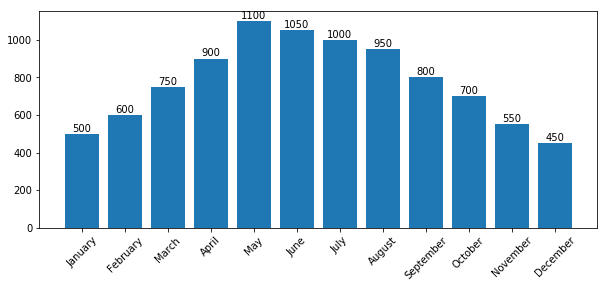

In [11]:
fig

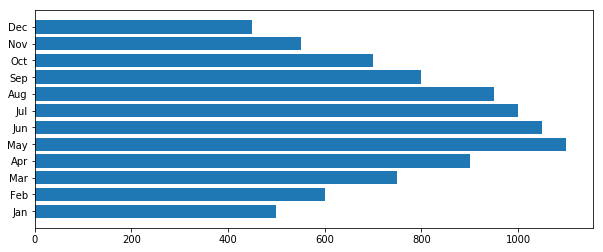

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
plt.yticks(month_num, calendar.month_abbr[1:13])
plot = ax.barh(month_num, units_sold)
plt.show()

## Scatter plot

In [13]:
data = pd.read_excel('scatter_ex.xlsx', 'age_weight')

In [14]:
x = data['age']
y = data['weight']

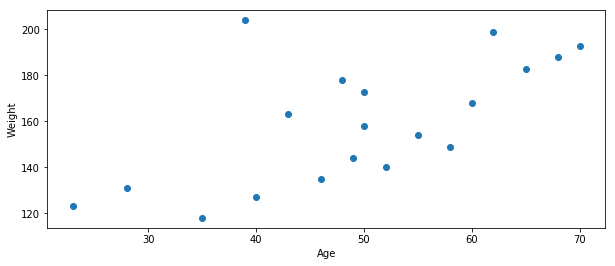

In [15]:
plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [16]:
iris = pd.read_csv('iris_dataset.csv', delimiter = ',')

In [17]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [18]:
iris.species = iris.species.map({"setosa": 0, "versicolor":1, "virginica":2 })

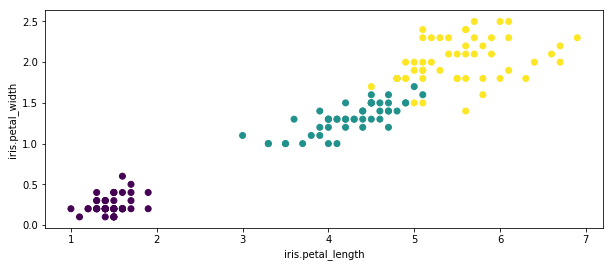

In [19]:
plt.figure(figsize=(10,4))
plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)
plt.xlabel("iris.petal_length")
plt.ylabel("iris.petal_width")
plt.show()

## Bubble plot

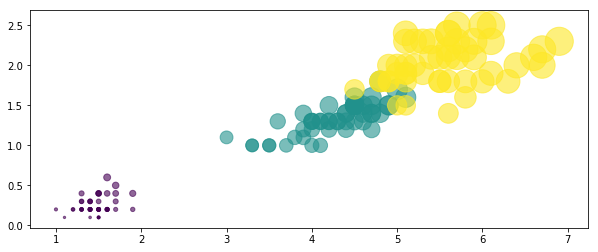

In [20]:
# The only difference is parameter s, and alpha
fig, ax = plt.subplots()
ax = plt.scatter(iris.petal_length, iris.petal_width, 
                 c=iris.species, s=50*iris.petal_length*iris.petal_width,
                 alpha = 0.6)
fig.set_size_inches(10, 4)

## Stacked plot

In [21]:
# Product defects by months:

x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)  # Data type is integer -- product defect codes
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

In [22]:
labels = ["April", "May", "June"]

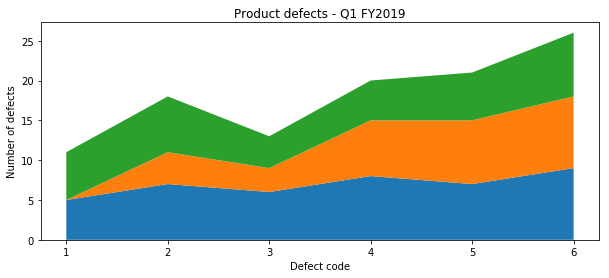

In [23]:
fig, ax = plt.subplots()
ax.stackplot(x, Apr, May, June, labels=labels)
fig.set_size_inches(10,4)
plt.xlabel("Defect code")
plt.ylabel("Number of defects")
plt.title("Product defects - Q1 FY2019")
plt.show()

## Pie plot

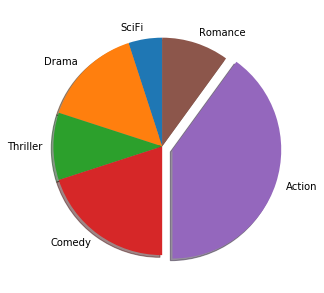

In [24]:
sectors = ["SciFi", "Drama", "Thriller", "Comedy", "Action", "Romance"]
sizes = [5, 15, 10, 20, 40, 10]

fig, ax = plt.subplots()
ax = plt.pie(sizes, labels=sectors, explode=(0, 0, 0, 0, 0.1, 0), shadow=True, startangle=90)
fig.set_size_inches(5, 5)
plt.show()

## Table chart

In [25]:
rows = ['2011', '2012', '2013', '2014', '2015']
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')
data = [[75, 144, 114, 102, 108],
       [90, 126, 102, 84, 126],
       [96, 114, 75, 105, 135],
       [105, 90, 150, 90, 75],
       [90, 75, 135, 75, 90]]

In [26]:
values = np.arange(0, 600, 100)
colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.5
y_offset = np.zeros(len(columns))

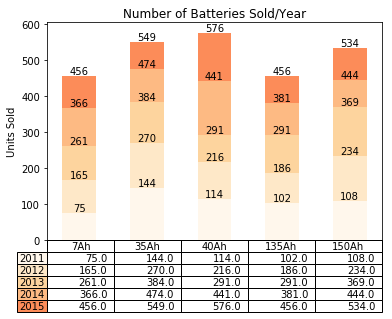

In [27]:
fig, ax = plt.subplots()
cell_text = []

n_rows = len(data)
for row in range(n_rows):
    plot = plt.bar(index, data[row], bar_width, bottom=y_offset,
                  color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i = 0
    # Each iteration of thsi for-loop, labels each bar with corresponding value for the given year
    for rect in plot: 
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i], '%d'
               % int(y_offset[i]), 
               ha='center', va='bottom')
        i = i+1
        
the_table = plt.table(cellText=cell_text, rowLabels=rows, 
                     rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title("Number of Batteries Sold/Year")
plt.show()

In [28]:
# Add a table to the bottom of the axis

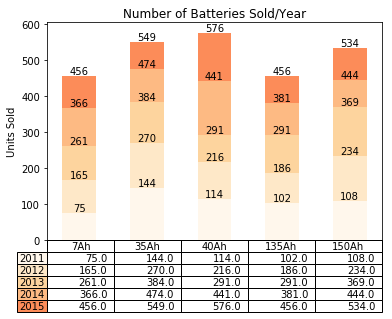

In [29]:
fig

## Polar plot

In [30]:
Depts = ["COGS", "IT", "Payroll", "R&D", "Sales & Marketing"]
rp = [30, 15, 25, 10, 20, 30]
ra = [32, 20, 23, 11, 14, 32]
theta = np.linspace(0, 2 * np.pi, len(rp))

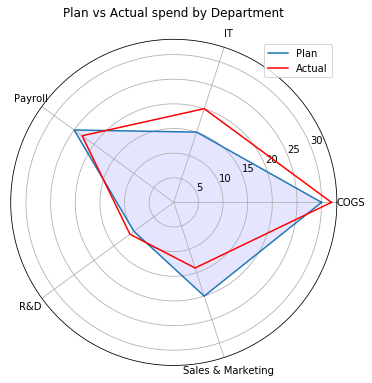

In [31]:
plt.figure(figsize=(10,6))
plt.subplot(polar=True)
(lines, labels) = plt.thetagrids(range(0, 360, int(360/len(Depts))), (Depts))
plt.plot(theta, rp)
plt.fill(theta, rp, 'b', alpha=0.1)
plt.plot(theta, ra, 'r')
plt.legend(labels=('Plan', 'Actual'), loc=1)
plt.title('Plan vs Actual spend by Department')
plt.show()

## Histogram

In [32]:
grp_exp = np.random.randn(1000)

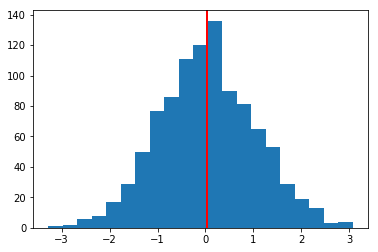

In [33]:
nbins = 21
n, bins, patches = plt.hist(grp_exp, bins=nbins)
plt.axvline(x=grp_exp.mean(), linewidth=2, color='r')
plt.show()

## Box plot

In [34]:
df = pd.read_csv('winequality.csv', delimiter=';')

In [35]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


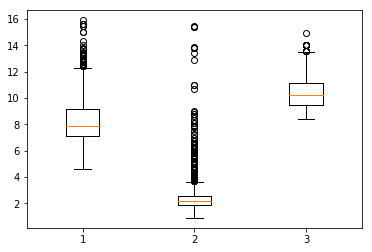

In [36]:
data_to_plot = [df['fixed acidity'], df['residual sugar'], df['alcohol']]
plt.boxplot(data_to_plot)
plt.show()

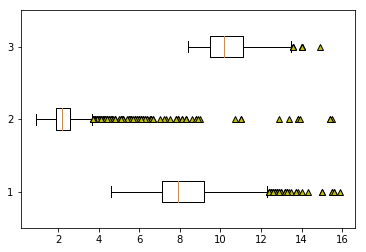

In [37]:
plt.boxplot(data_to_plot, vert=False, flierprops=dict(markerfacecolor='y', marker='^'))
plt.show()

## Violin plot

In [38]:
# Violin plot is a combination of Histogram and Boxplot. It gives information on the complete distribution of data, 
# along with mean/median, min, and max values:

wine_quality = pd.read_csv('winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]

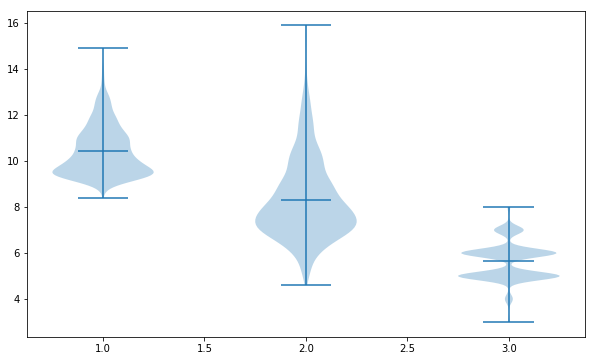

In [39]:
plt.figure(figsize=(10, 6))
plt.violinplot(data, showmeans=True)
plt.show()

## Reading and displaying images

In [40]:
# Pyplot has features that enable us to read .jpeg and .png images and convert them to pixel format to 
# display as images:

import matplotlib.pyplot as plt
image = plt.imread('louvre.jpg')

In [41]:
image.shape

(600, 800, 3)

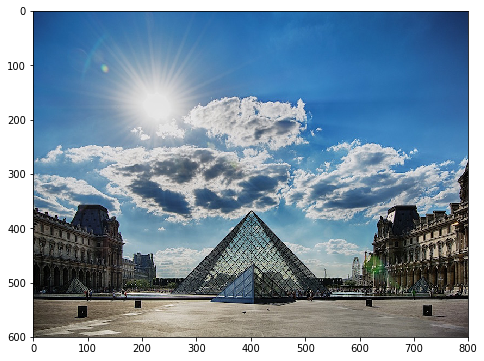

In [42]:
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.show()

## Heatmap

In [43]:
# Heatmap is used to visualize data range in a different colors with varying intensity - example would be 
# plotting a correlation matrix as a heatmap. Elements of the matrix indicate the strength of a linear relationship:

import matplotlib.pyplot as plt
import pandas as pd

In [44]:
wine_quality = pd.read_csv('winequality.csv', delimiter=';')

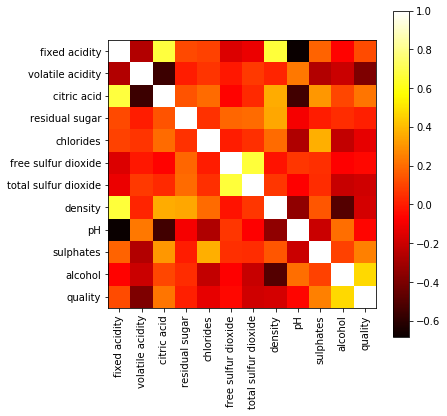

In [45]:
plt.figure(figsize=(6, 6))
corr = wine_quality.corr()
plt.imshow(corr, cmap='hot')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.show()

## Hilton diagram -- UNFINISHED

In [96]:
# Hilton diagram is a 2D plot for visualizing weight matrices in deep-learning applications. Matplotlib does not
# have a direct method to plot this diagram -- see code below:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matrix = np.asarray((pd.read_excel('weight_matrix.xlsx', header=None))) # missed, needs to specify header

In [97]:
matrix.shape

(20, 7)

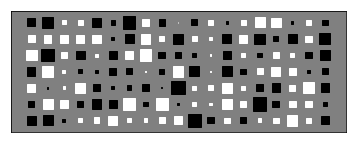

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matrix = np.asarray((pd.read_excel('weight_matrix.xlsx')))

fig, ax = plt.subplots()

max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for (x, y), w in np.ndenumerate(matrix):
    color = 'white' if w > 0 else 'black'
    size = np.sqrt(np.abs(w) / max_weight)
    rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                         facecolor=color, edgecolor=color)
    ax.add_patch(rect)

ax.autoscale_view()

plt.show()

RuntimeError: Can not put single artist in more than one figure

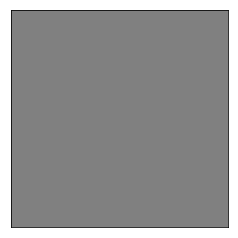

In [98]:
fig, ax = plt.subplots()
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

for (x, y), w in np.ndenumerate(matrix):
    color = 'white' if w > 0 else 'black'
    size = np.sqrt(np.abs(w) / max_weight)
    rec = plt.Rectangle([x - size / 2, y - size / 2], size, size, facecolor=color, edgecolor=color)
    ax.add_patch(rect)
ax.autoscale_view()
plt.show()

## Contour plot

In [49]:
# Countour plot is typically used to display how the error varies with varying coefficients that are being
# optimized in a machine learning algorithm, such as linear regression. If the linear regression coefficients
# are 'theta0' and 'theta1', and the error between the predicted value and the actual is a 'Loss', then for a given
# Loss value, all the values of theta0 and theta1 form a contour. For a different value of Loss, different
# contours are formed by varying teh values of theta0 and theta1.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm # <== Library specifically for color mapping 

In [50]:
Loss = pd.read_excel('Loss.xlsx')
theta0_vals = pd.read_excel('theta0.xlsx')
theta1_vals = pd.read_excel('theta1.xlsx')

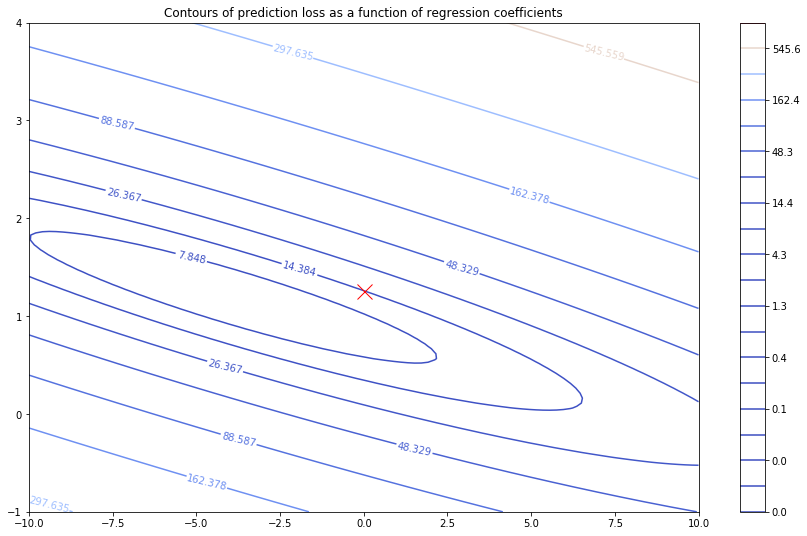

In [79]:
fig = plt.figure(figsize=(15, 9))
X, Y = np.meshgrid(theta0_vals, theta1_vals)
CS = plt.contour(X, Y, Loss, np.logspace(-2, 3, 20), cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(theta[0], theta[1], 'rx', markersize=15, linewidth=2)
plt.title("Contours of prediction loss as a function of regression coefficients")
plt.colorbar()
plt.show()

## Triangulation

In [52]:
# Triangulation is used to plot geographical maps, which help with understanding the relative distance between
# various points. The longitude and latitude values are used as x, y coordinates to plot the points

xy = np.array([[-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888],
              [-0.054, 0.890], [-0.045, 0.897], [-0.057, 0.895], 
              [-0.073, 0.900], [-0.087, 0.898],
              [-0.090, 0.904], [-0.069, 0.907]]) #longtitude and latitude in radians

In [53]:
x = np.degrees(xy[:,0]) #convert from radians to degrees
y = np.degrees(xy[:,1])

In [54]:
triangles = np.array([[1, 2, 3], [3, 4, 5], [4, 5, 6], [2, 5, 6], 
                      [6, 7, 8], [6, 8, 9], [0, 1, 7]])

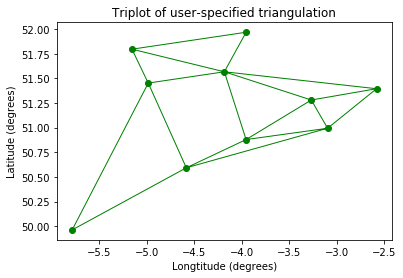

In [55]:
plt.triplot(x, y, triangles, 'go-', lw=1.0)
plt.title('Triplot of user-specified triangulation')
plt.xlabel('Longtitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

## Stream plot

In [81]:
# Stream plots, aka streamline plots, are used to visualize vector fields. They use vectors and their velocities 
# as a function of base vector to draw these plots:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [82]:
x, y = np.linspace(-3, 3, 100), np.linspace(-2, 4, 50)
X, Y = np.meshgrid(x, y)

In [83]:
U = 1 - X ** 2 # compute velocities U and V as a function of X and Y respectively
V = 1 - Y ** 2

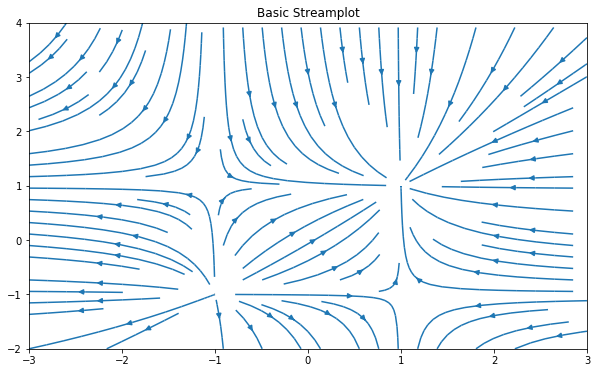

In [86]:
fig = plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U, V)
plt.title('Basic Streamplot')
plt.show()

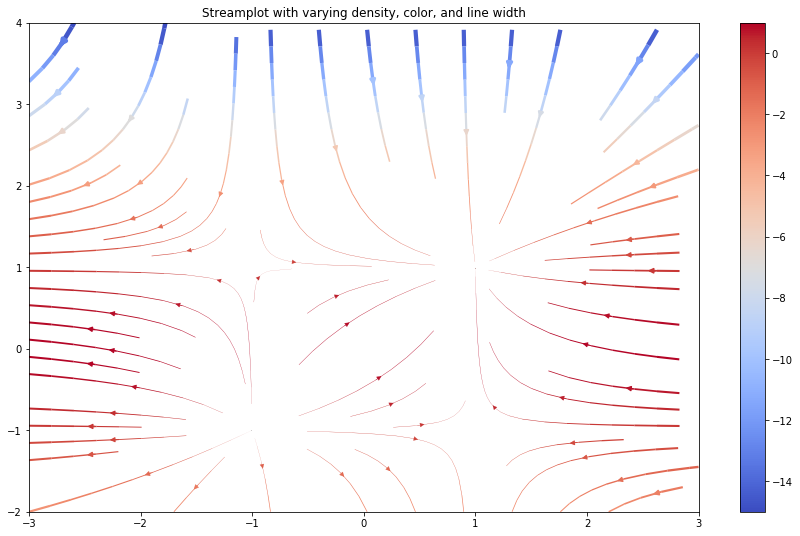

In [85]:
# Controling for density and thickness as functions of the speed and color of the stream lines
fig = plt.figure(figsize=(15, 9))
speed = np.sqrt(U * U + V * V) # define speed as a function of U and V
lw = 5 * speed / speed.max() # varying line width along a streamline
strm = plt.streamplot(X, Y, U, V, density=[0.5, 1], color=V, linewidth=lw, cmap=cm.coolwarm)
plt.colorbar(strm.lines)
plt.title('Streamplot with varying density, color, and line width')
plt.show()

## Path